# Model Task Types - Support Vector Regression

> Objectives:
>
> - Learn how to implement **Support Vector Regression (SVR)** for predicting numerical targets.
> - Use the **Wine Quality Dataset**, which contains data on the chemical properties of wine and its quality score.
> - Build, train, and evaluate an **SVR model** to predict wine quality.
> - Analyze model performance using metrics and visualization.

### Main Goal
The objective is to use a **Support Vector Regression (SVR)** model to predict the **quality** of wine (the `quality` column) based on its chemical composition.
This is a **regression problem**, where the target variable `quality` is a continuous numeric value representing the wine's quality score.

### Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


### Dataset: Red Wine Quality

The dataset includes key chemical properties such as **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide levels, density, pH, sulphates, and alcohol content**, which influence wine quality. By leveraging these features, we aim to develop a model that can effectively estimate wine quality scores.

**Dataset Source:** [Wine Quality Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)  

### Step 1: Load the Dataset

In [21]:
file_path = "./red-wine-quality-dataset/winequality-red.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["quality"])  # Use all chemical properties as features without the quality
y = df["quality"]  # Target: wine quality score

# Display sample data
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Step 2: Split the Data

The dataset is split into training and testing sets, with 80% of the data used for training and 20% reserved for testing. Setting `random_state=42` ensures reproducibility of results.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Standardize Data

We need to standardize the data because SVR is sensitive to feature scaling. SVR relies on distance-based calculations (e.g., the kernel trick), and features with larger numerical ranges can dominate those with smaller ranges, leading to a biased model.

#### Key Reasons for Standardization:
1. **Equal Contribution of Features**
   - Standardization scales all features to have a **mean of 0 and a standard deviation of 1**, preventing any single feature from disproportionately influencing the model.

2. **Improved Convergence**
   - Many optimization algorithms, including those used in SVR, perform better and **converge faster** when features are standardized.

By applying `StandardScaler()`, we ensure that SVR can learn effectively from the data without being skewed by differences in feature scales.

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 4: Train the Model

In **SVR**, the choice of kernel determines how the model maps input features into a higher-dimensional space to find patterns in the data. The **Radial Basis Function (RBF) kernel** is a popular choice because it **captures complex, non-linear relationships** between features.

**Key Reasons for Using the RBF Kernel:**

- Unlike **linear kernels**, RBF can model intricate patterns in data by transforming inputs into a higher-dimensional space.

- The RBF kernel automatically adjusts to the complexity of the data, making it effective for datasets where relationships are not explicitly linear.

- By mapping data into an infinite-dimensional space, RBF helps in creating a smooth function that generalizes well to new, unseen data.



In [24]:
svr = SVR(kernel="rbf")  # Radial basis function kernel
svr.fit(X_train_scaled, y_train)

SVR()

### Step 5: Get the Predictions

In [25]:
y_pred = svr.predict(X_test_scaled)


### Step 6: Evaluate the Model

In this step, we evaluate the model's performance using several metrics to understand its accuracy:

- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate better accuracy.
- **R-Squared (R²)**: Indicates how well the model explains variance in the target variable. A value closer to 1 means better performance.

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.351
R² Score: 0.462


### Step 7: Visualize Actual vs Predicted Results

Now that we have trained our **SVR** model, lets visualize how it performed. We will plot the actual vs. predicted values, in order to assess how well the model captures trends and identify any systematic errors.

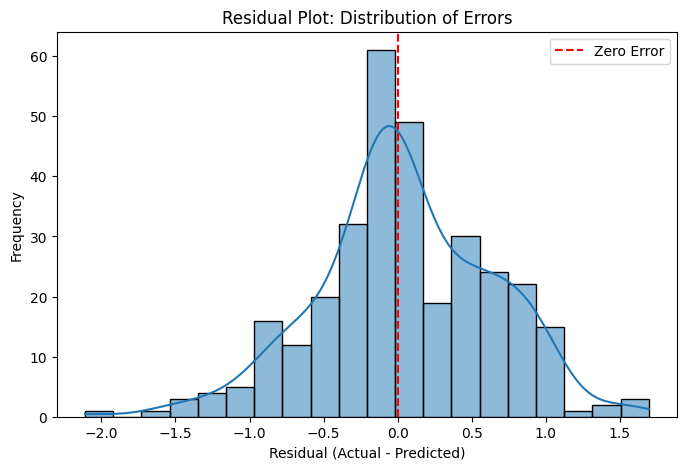

/var/folders/bl/27y7l3fx5f94nkpls3krzn500000gp/T/ipykernel_58751/2354526332.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


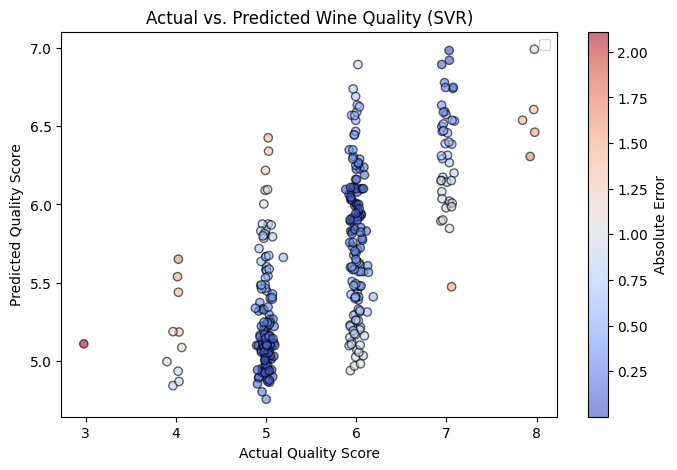

In [27]:
# Residual Plot (Error Visualization)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Error")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Plot: Distribution of Errors")
plt.legend()
plt.show()

# Parity Plot (Actual vs. Predicted)
plt.figure(figsize=(8, 5))
jitter = np.random.normal(0, 0.05, size=len(y_test))
errors = np.abs(y_test - y_pred)
plt.scatter(y_test + jitter, y_pred, c=errors, cmap="coolwarm", alpha=0.6, edgecolors="k")
plt.colorbar(label="Absolute Error")
plt.xlabel("Actual Quality Score")
plt.ylabel("Predicted Quality Score")
plt.title("Actual vs. Predicted Wine Quality (SVR)")
plt.legend()
plt.show()


### Insights from the Graph

#### Residual Plot: Distribution of Errors
The residual plot helps us understand how prediction errors are distributed. The plot shows that small residuals occur more frequently, meaning the model's predictions are generally close to the actual values. Larger residuals are less frequent, indicating that while the model occasionally makes significant errors, these are relatively rare.

#### Actual vs. Predicted Wine Quality (SVR)
This plot visualizes the relationship between predicted and actual wine quality scores. The x-axis represents the predicted values, while the y-axis represents the actual values. We use color-coding to indicate accuracy: **darker blue dots** represent more accurate predictions, while **reddish dots** indicate larger errors.

From the plot, we observe a higher concentration of bluish dots, especially dark blue ones, suggesting that the model produces more accurate predictions than incorrect ones.